In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

# PRE-PROCESSING

In [2]:
dataset = pd.read_csv('data/cell_phones_reviews.csv')
dataset.head()

,overall,reviewText,description,brand,feature,price,asin
0,1.0,I had been very happy with my Motorola phone u...,"['used,good,with charger,one of the first in a...",Motorola,"[""The Motorola i730's advanced features, inclu...",NaN,B0000SX3BK
1,1.0,I had been very happy with my Motorola phone u...,"['used,good,with charger,one of the first in a...",Motorola,"[""The Motorola i730's advanced features, inclu...",NaN,B0000SX3BK
2,3.0,I don't own this phone. I own the cheaper Moto...,"['used,good,with charger,one of the first in a...",Motorola,"[""The Motorola i730's advanced features, inclu...",NaN,B0000SX3BK
3,3.0,I don't own this phone. I own the cheaper Moto...,"['used,good,with charger,one of the first in a...",Motorola,"[""The Motorola i730's advanced features, inclu...",NaN,B0000SX3BK
4,4.0,Great phone by Motorola - leaps and bounds ove...,"['used,good,with charger,one of the first in a...",Motorola,"[""The Motorola i730's advanced features, inclu...",NaN,B0000SX3BK


ESPLORIAMO IL DATASET

In [3]:
dataset.shape

(42170, 7)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42170 entries, 0 to 42169
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   overall      42170 non-null  float64
 1   reviewText   42143 non-null  object 
 2   description  42170 non-null  object 
 3   brand        42170 non-null  object 
 4   feature      42170 non-null  object 
 5   price        17688 non-null  object 
 6   asin         42170 non-null  object 
dtypes: float64(1), object(6)
memory usage: 2.3+ MB


In [5]:
dataset.isnull().sum()

overall            0
reviewText        27
description        0
brand              0
feature            0
price          24482
asin               0
dtype: int64

Rimozione righe con valori null per prezzo e reviewText

In [6]:
dataset.dropna(subset=['price', 'reviewText'], inplace=True)

In [7]:
# regex per il formato corretto dei prezzi
regex = re.compile(r'^\$\d+\.\d+$')

# Filtriamo i dati applicando la regex alla colonna 'price'
dataset = dataset[dataset['price'].apply(lambda x: bool(regex.match(x)))]

In [8]:
dataset.reset_index(drop=True, inplace=True)
dataset.head()

,overall,reviewText,description,brand,feature,price,asin
0,5.0,I have read a lot of the reviews and spoken to...,['Like new in box great looking phone get it b...,Motorola,[],$17.99,B000FYU4SO
1,4.0,Or maybe not. The good news is that for less ...,['Like new in box great looking phone get it b...,Motorola,[],$17.99,B000FYU4SO
2,4.0,Having previously owned the LG VX9800 (one of ...,['Like new in box great looking phone get it b...,Motorola,[],$17.99,B000FYU4SO
3,3.0,3.5 stars. I was very excited about the launc...,['Like new in box great looking phone get it b...,Motorola,[],$17.99,B000FYU4SO
4,1.0,I want to warn IT professionals that Verizon W...,['Like new in box great looking phone get it b...,Motorola,[],$17.99,B000FYU4SO


In [9]:
# Rimuoviamo il simbolo del dollaro dalla colonna 'prezzi'
dataset['price'] = dataset['price'].str.replace('$', '', regex=False).astype(float)

In [10]:
print(dataset.shape)
dataset.isnull().sum()

(17568, 7)


overall        0
reviewText     0
description    0
brand          0
feature        0
price          0
asin           0
dtype: int64

Quanti cellulari diversi sono rimasti dopo aver rimosso le reviews 

In [11]:
len(dataset['asin'].unique())

438

Quali sono i brand di cellulari con più reviews, in seguito alla rimozione

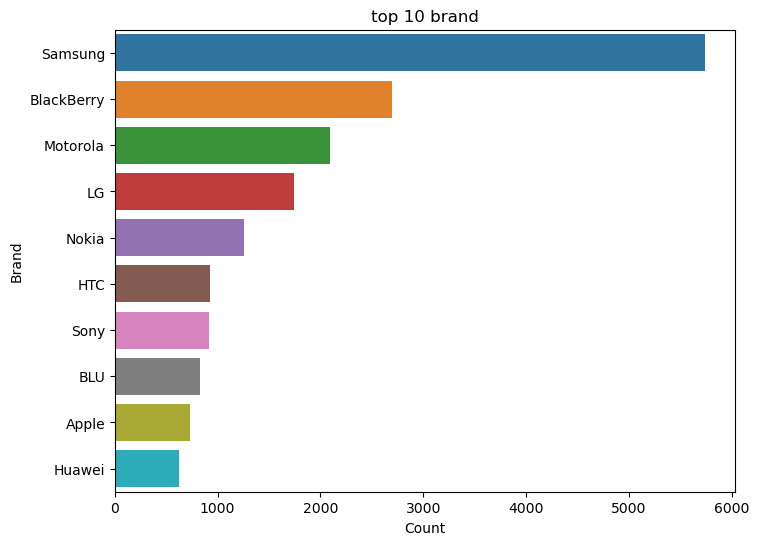

In [12]:
cell_phones_brand_counts = dataset['brand'].value_counts().reset_index()
cell_phones_brand_counts.columns = ['brand', 'count'] 
# Plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x = cell_phones_brand_counts['count'], y = cell_phones_brand_counts['brand'], orient='h')
plt.title('top 10 brand')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.show()

Data Preprocessing

In [13]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('universal_tagset')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is alr

True

In [14]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [15]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [16]:
from tqdm import tqdm
from afinn import Afinn

afinn = Afinn()
def preprocess(df, column):
    preprocessed_column = []
    # Initialize the AFINN lexicon
    for row in tqdm(df[column], total = len(df[column])):
        afinn_scores = []
        text_cleaned = re.sub(r'[^\w\s]', '', row) #cleaning
        words = nltk.word_tokenize(text_cleaned) #tokenization
        preprocessed_words = [lemmatizer.lemmatize(w.lower()) for w in words if not w in stop_words] #stopwords removal and lemmatization
        tagged_words = nltk.pos_tag(preprocessed_words, tagset='universal') #POS-tagging
        #afinn scores
        for word, tag in tagged_words:
            score = afinn.score(word)
            afinn_scores.append((word, tag, score))
        preprocessed_column.append(afinn_scores)

    return preprocessed_column

In [17]:
dataset['preprocessedReviewText'] = preprocess(dataset, 'reviewText')

100%|███████████████████████████████████████████████████████████████████████████| 17568/17568 [02:43<00:00, 107.34it/s]


In [18]:
dataset.head()

,overall,reviewText,description,brand,feature,price,asin,preprocessedReviewText
0,5.0,I have read a lot of the reviews and spoken to...,['Like new in box great looking phone get it b...,Motorola,[],17.99,B000FYU4SO,"[(i, NOUN, 0.0), (read, VERB, 0.0), (lot, NOUN..."
1,4.0,Or maybe not. The good news is that for less ...,['Like new in box great looking phone get it b...,Motorola,[],17.99,B000FYU4SO,"[(or, CONJ, 0.0), (maybe, ADV, 0.0), (the, DET..."
2,4.0,Having previously owned the LG VX9800 (one of ...,['Like new in box great looking phone get it b...,Motorola,[],17.99,B000FYU4SO,"[(having, VERB, 0.0), (previously, ADV, 0.0), ..."
3,3.0,3.5 stars. I was very excited about the launc...,['Like new in box great looking phone get it b...,Motorola,[],17.99,B000FYU4SO,"[(35, NUM, 0.0), (star, NOUN, 0.0), (i, NOUN, ..."
4,1.0,I want to warn IT professionals that Verizon W...,['Like new in box great looking phone get it b...,Motorola,[],17.99,B000FYU4SO,"[(i, NOUN, 0.0), (want, VERB, 1.0), (warn, ADP..."


In [21]:
dataset['reviewText'].iloc[1000]

'Excellent! Great seller, great product as new. 10000% recommend this seller.'

In [20]:
dataset.drop(columns=['feature'], inplace=True)

In [24]:
dataset.to_csv('data/preprocessed_dataset.csv', index=False, sep=';')